# Lab 1_CAO SILIANG_A0275753U

# Question 1
Use the Python version of the “Numerical Recipes” LU decomposition 
functions [ludcmp(), lubksb()] to solve the following 4×4 linear equations, and 
verify, by hand or using other software, such as Matlab, or a consistent check,
that the answers are correct. 

# Answer of question 1 
we transform the code into python from the following reference:
Numerical.Recipes.in.C.The.Art.of.Scientific.Computing).William.H.Press. p46-p47

In [18]:
import math
"""
In this are,we define the function we need.
"""
def linearsolver(a,b):
    
    indx = list(range(len(a)))   #generate a list to save pivot element.
    #print(indx)
    ludcmp(a,indx,b)
    lubksb(a,indx,b)
    
    return b
    

def ludcmp(a,indx,b):
    # collect pivot first and then use Grout method
    vv = ratio(a,indx)
    Grout(a,indx,b,vv)


def ratio(a,indx):
    # choose the largest one of each row as pivot element
    # 1/(pivot element) will be saved in vv
    n = len(a)
    vv = indx.copy()

    for i in range (0,n,1):
        big = 0.0
        for j in range(0,n):
            if math.fabs(a[i][j])>big:
                big = math.fabs(a[i][j])
        vv[i] = 1/big
    #print(vv)
    return vv


def Grout(a,indx,b,vv):
    d = 1.0
    n = len(a)
    for j in range(0,n):
        big = 0.0
        #This loop are designed for i<j, upper triangle
        for i in range(0,j):
            sum = a[i][j]
            #print(j,i,a[i][j])
            for k in range(0,i):             #when i euqal to zero, the sum = aij
                sum = sum-a[i][k]*a[k][j]
            a[i][j]=sum                      #sum will not be changed if i = 0
            #print(a[i][j])
        #This loop are designed for i >=j, lower triangle
        for i in range(j,n):
            sum = a[i][j]
            for k in range(0,j):
                sum = sum-a[i][k]*a[k][j]
            a[i][j]=sum
            dum = vv[i]*math.fabs(sum)       #use ratio
            if (dum>=big):
                big = dum                    #largest for each colunm
                imax = i
        #swap if ajj is not the largest for column j
        if (j!= imax):                       #if the lagest number is not in j column j row 
            for k in range(0,n):
                dum=a[imax][k]
                a[imax][k] = a[j][k]
                a[j][k] = dum                #swaping the i row with j row 
                
            d = -d                           #the number of row interchanges was even or odd
            vv[imax] =vv[j]                  #swaping ratio, the imax in later loop still need this,while ratio of j was used befores
        
        indx[j] = imax                       #using[1,2,3,4]to save the order of the largest aij for each j
        if(j!=n-1):                          #
            dum = 1.0/(a[j][j])              #
            for i in range(j+1,n):
                a[i][j]*=dum                 #aij = 1/bjj(sum)
    return(a)
            
def lubksb(a,indx, b):
    n = len(a)
    ii = -1
    # forward
    for i in range(0,n):
        ip = indx[i]
        sum = b[ip]
        b[ip] = b[i]
        if(ii != -1):
            for j in range(ii,i):
                sum -= a[i][j]*b[j]
        elif(sum != 0):
            ii = i
        b[i] = sum
    # bote alpha_{ii} is 1 above
    #  backward
    for i in range(n-1,-1,-1):
        sum = b[i]
        for j in range(i+1,n):
            sum -= a[i][j]*b[j]
        b[i] = sum/a[i][i]

"""
Initialization area
a is the matrix of coefficients
b is the right-hand side written as a column vector

"""
a=[[1,3,3,-5],[2,-4,7,-1],[7,0.5,3,-6],[9,-2,3,8]]
b=[0,2,3,-10]

"""
caculation area

"""
result = linearsolver(a,b)
print("The final result of x is")
print(result)

The final result of x is
[-0.21443944433574616, -1.265114459009979, -0.5364899236939936, -1.1238505184895327]


#### The following cells are to exam our result
The result is correct if we ignore the tiny inaccuracy

# Question 2
Consider square grids of L × L resistor network shown below on the next page
(for the case of L=4). Given that point A has voltage 0 volt and B voltage 1
volt, compute the total current flowing from B to A, in units of ampere, and 
the total resistance of the network. We assume that each link has a resistance
r = 1 Ω. Use the same linear solver as in problem 1 above. Report the 
results on L = 1, 2, 4, 8, 16, 32, …, in the power of two (as large as you can
get), and the times needed (using Python time()). Then compare the answers 
and times with scipy linalg.solve() results as well. Also, check your computer 
answer against hand calculation for the case of L= 2.  

To set up the linear equations, you need (1) Ohm’s law Iij = (Vj-Vi)/r for each 
link, (2) conservation of current Σ Iij = 0 at each node. And make linear 
equations for the voltage at each node. You need a good naming convention 
for the sites in order to construct the matrix A, and figure out what is b, such 
that Ax=b, where x is the voltage of each node. Pay attention to the difference 
between the internal node which has four neighbors vs those at the edge which 
has less number of neighbors. Be careful about the sign of the current. The 
program should work for general L as an input parameter

# Answer of question 2
## 2.1 caculation of current and resistance for different L

We might as well invert the image left and right.In this way, it would be easier for us to sort the nodes.   
While B is the beggining and A is the end of the "Fake matrix", making them easy to cut-off.
  
In the following code,after using Kirchhoff's Current Law for each nodes:  

we can get Ax= b where:  
- the elements of A are the coefficient of V of each nodes
- the elements of x are the V of each nodes.  
- the elements of b are -coefficient_of_Vb*Vb (the part of VA disappear,because Va=0)

After simplifying the system of linear equations, we obtain the following law:  
for each rows for single nodes:
- we check if this node have neighbors in four dierections: up, down, right, left.
- for each neighbors, the coefficient of this node +1; while that of its neighbors minus 1. 

After we get the V of each nodes, we can easily caculate the current flow out from nodes B,  
Then the total resistance of the network is (Vb-Va)/I

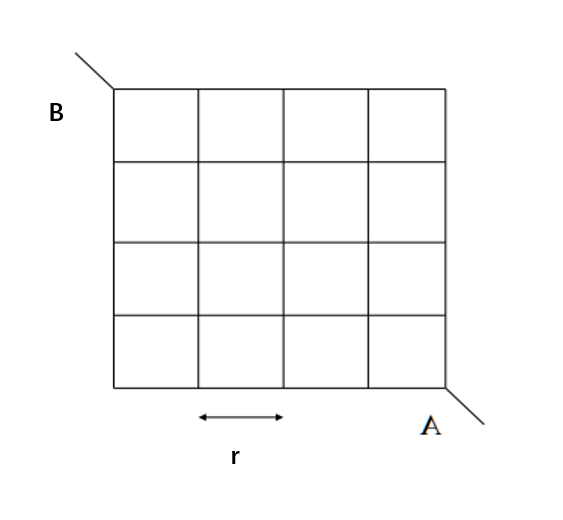

In [4]:
from IPython.display import Image, display
display(Image(filename='LAB1_Q2.png'))

In [11]:
# generate a matrix without considering the initial condition
# we call it Fake A
def FAgenerator(L):
    n = L+1                            # the number of nodes per row/column
    N = n*n                            # the number of total nodes
    FA= [[0 for _ in range(N)] for _ in range(N)]
    
    for k in range(0,N):              
        i = k//n                       # The position of node in network 
        j = k%n

        # The following 4 "if" are to check if the node is on one of the egdes
        if (j > 0):                    # ij should have a neighbors in its lefti
            FA[k][k] += 1              # ij plus one for each neighbors
            FA[k][k-1] += -1           # its neighbors minus 1
        if (i > 0):                    # up neighbors
            FA[k][k] += 1             
            FA[k][k-n] += -1    
        if (j < n-1):                  # right neighbor
            FA[k][k] += 1             
            FA[k][k+1] += -1  
        if (i < n-1):                  # down neighbot
            FA[k][k] += 1             
            FA[k][k+n] += -1  

    return FA

# However, we can not use Kirchhoff's Current Law in both A and B
# The flow always flow out from B and flow in to A
# We should cut off the FA, and found a new matrix
# We call it True A, 
# The coefficient of Vb are moved to the right side, so it will not be shown in TA
def TAgenerator(FA):
    n = len(FA)
    TA= [[0 for _ in range(n-2)] for _ in range(n-2)]
    
    for i in range(0,n-2):
        for j in range(0,n-2):
            TA[i][j] =FA[i+1][j+1]     #ignore the begging and the end, which are related to vb and va
    return TA

# Since we know the value of Vb Va,we move it to the right side
# they become the element of b we need
# coeffienceof va disappear because va = 0
def bgenerator(FA):
    n = len(FA)
    b = [0]*(n-2)
    for i in range(0,n-2):
        b[i] -= FA[i+1][0]
        
    return b 

#now that we have A and b, we can caculate x;
#LU method with printing a lot of date
def LLsolver_debug(L):
 
    print("The Fake matrixA(N*N) is")
    FA= FAgenerator(L)
    for row in FA:
        print(row)
    print("\nThe true matrixA(N-2*N-2) is")
    TA = TAgenerator(FA)
    for row in TA:
        print(row)
    print("\nthe b(N-2) is")
    b = bgenerator(FA)
    print(b)

    result = linearsolver(TA,b)
    print("\nThe result x is")
    for row in result:
        print(row)

    printresult(result)
    
#LU method
def LLsolver_LU(L):
    #print("The L is",L)
    FA= FAgenerator(L)
    TA = TAgenerator(FA)
    b = bgenerator(FA)
    result = linearsolver(TA,b)
    
    printresult(result)

def LLsolver_scipy(L):
    #print("The L is",L)
    FA= FAgenerator(L)
    TA = TAgenerator(FA)
    b = bgenerator(FA)
    result = scipy.linalg.solve(TA, b)

    printresult(result)
    
def printresult(result):
    current = 2*(1-result[0])/1
    print("\nThe total current is",current)
    R = (1-0)/current
    print("The total resistance is",R)
    
result = LLsolver_debug(4)

The Fake matrixA(N*N) is
[2, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-1, 3, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, -1, 3, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, -1, 3, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, -1, 2, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, 0, 3, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, -1, 0, 0, 0, -1, 4, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, -1, 0, 0, 0, -1, 4, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, -1, 0, 0, 0, -1, 4, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, -1, 0, 0, 0, -1, 3, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 3, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 4, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, -1,

# 2.2 check your computer answer against hand calculation for the case of L= 2

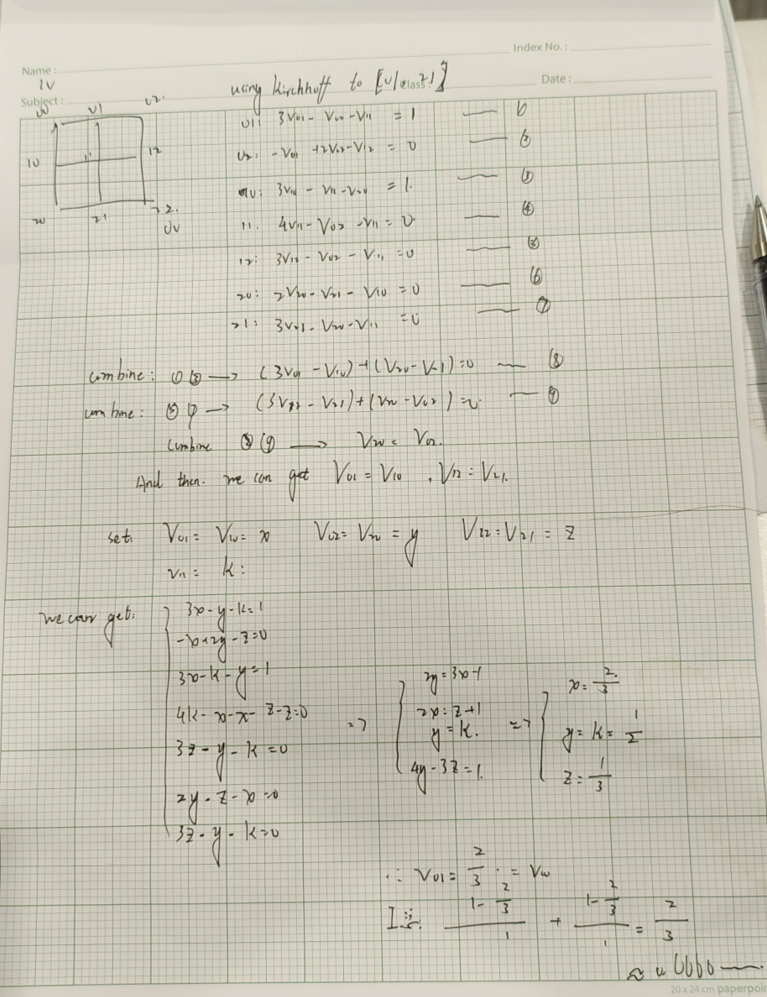

In [6]:
from IPython.display import Image, display
display(Image(filename='LAB1_Q2A.png'))

## 2.3Compare the answers and times with scipy linalg.solve() results as well.

In [7]:
#running LU method
import scipy.linalg
import time
order = 1  

A = []      #save the order of LU
B = []      #sace the time cost of LU

#when L >32, the loop cannot output result.
while order < 64:
    start_time = time.time()
    LLsolver_LU(order)
    end_time = time.time()
    t = end_time-start_time
    A.append(order)
    B.append(t)
    print("when the L is",order,"and the computational time is",t)
    order = order*2



The total current is 1.0
The total resistance is 1.0
when the L is 1 and the computational time is 0.0

The total current is 0.6666666666666667
The total resistance is 1.4999999999999998
when the L is 2 and the computational time is 0.0

The total current is 0.4680851063829783
The total resistance is 2.1363636363636385
when the L is 4 and the computational time is 0.006743669509887695

The total current is 0.3474493462681634
The total resistance is 2.8781173737716412
when the L is 8 and the computational time is 0.05257368087768555

The total current is 0.2713267975019533
The total resistance is 3.6855924634307486
when the L is 16 and the computational time is 1.9744024276733398

The total current is 0.22077713943731947
The total resistance is 4.529454465025844
when the L is 32 and the computational time is 108.51952648162842


In [8]:
C = []          #order of scipy
D = []          #time of scipy
order = 1  

while order < 256:
    start_time = time.time()
    LLsolver_scipy(order)
    end_time = time.time()
    t = end_time-start_time
    C.append(order)
    D.append(t)
    print("when the L is",order,"and the computational time is",t)
    order = order*2


The total current is 1.0
The total resistance is 1.0
when the L is 1 and the computational time is 0.01648712158203125

The total current is 0.6666666666666663
The total resistance is 1.5000000000000009
when the L is 2 and the computational time is 0.004591703414916992

The total current is 0.46808510638297895
The total resistance is 2.1363636363636354
when the L is 4 and the computational time is 0.11740970611572266

The total current is 0.3474493462681627
The total resistance is 2.878117373771647
when the L is 8 and the computational time is 0.011774539947509766

The total current is 0.2713267975019511
The total resistance is 3.685592463430779
when the L is 16 and the computational time is 0.05773568153381348

The total current is 0.22077713943731858
The total resistance is 4.529454465025862
when the L is 32 and the computational time is 0.7273967266082764

The total current is 0.18544698184718755
The total resistance is 5.392376786288289
when the L is 64 and the computational time 

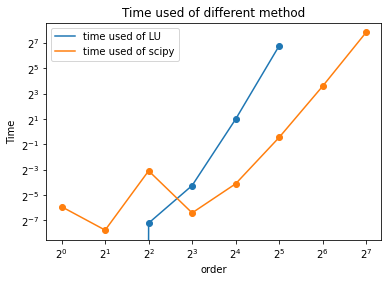

In [9]:
import matplotlib.pyplot as plt

plt.scatter(A, B)
plt.scatter(C, D)
plt.plot(A, B, label='time used of LU')
plt.plot(C, D, label='time used of scipy')
plt.title('Time used of different method')
plt.xscale('log',base=2)
plt.yscale('log',base=2 )
plt.xlabel('order')
plt.ylabel('Time')

plt.legend()

plt.show()


I repeat this process a lot of time.  
While n∈[1,8), the lu decomposition is fast.  
While n∈[8，infinity), the scipy linalg.solve() is fast.

We will output the result in a form in the following cells.

In [10]:
from tabulate import tabulate
print(tabulate({'L':C,'Time of LU(s)': B, 
'Time of spicy(s)': D, }, headers="keys",tablefmt='github'))

|   L |   Time of LU(s) |   Time of spicy(s) |
|-----|-----------------|--------------------|
|   1 |      0          |          0.0164871 |
|   2 |      0          |          0.0045917 |
|   4 |      0.00674367 |          0.11741   |
|   8 |      0.0525737  |          0.0117745 |
|  16 |      1.9744     |          0.0577357 |
|  32 |    108.52       |          0.727397  |
|  64 |                 |         11.952     |
| 128 |                 |        227.179     |
